In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score

DỰ ĐOÁN TÍN HIỆU ECG

In [2]:
# Đọc file CSV vào DataFrame
df = pd.read_csv('../File CSV/MIT-BIH/208_MLII.csv', header=None)
data=df.drop(columns=187)
data=data.values

In [3]:
train_size = 0.8
test_size = 1 - train_size

# Tính số lượng dòng cho tập train
num_train_samples = int(len(data) * train_size)

# Chia dữ liệu thành tập train và tập test
train_data = data[:num_train_samples]
test_data = data[num_train_samples:]

In [4]:
#Chia khung
window_input= 10
window_out=5

In [5]:
# Số lượng lặp qua dữ liệu
num_samples_train = len(train_data) - window_input - window_out + 1
num_samples_test = len(test_data) - window_input - window_out + 1

# Đối với tập train
# Tạo dữ liệu train từ cửa sổ trượt
X_train, y_train, X_test, y_test = [], [], [], []

for i in range(num_samples_train):
    X_window = data[i:i+window_input]
    y_window = data[i+window_input:i+window_input+window_out]

    X_train.append(X_window)
    y_train.append(y_window)



In [6]:
# Đối với tập test
for i in range(num_samples_test):
    X_window = data[i:i+window_input]
    y_window = data[i+window_input:i+window_input+window_out]

    X_test.append(X_window)
    y_test.append(y_window)

In [7]:
X_train= np.array(X_train)
y_train= np.array(y_train)
X_test= np.array(X_test)
y_test= np.array(y_test)

In [8]:
# Tạo một mô hình LSTM
model = Sequential()
model.add(LSTM(64,activation='relu' ,input_shape=(10, 187)))  # Đặt input_shape phù hợp với kích thước của mảng X_train
model.add(Dense(5 * 187))  # Đặt lớp Dense phù hợp với kích thước của mảng y_train
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train, y_train.reshape(-1, 5 * 187), epochs=64, batch_size=16)

Epoch 1/64
93/93 [==============================] - 3s 8ms/step - loss: 0.0259
Epoch 2/64
93/93 [==============================] - 1s 7ms/step - loss: 0.0209
Epoch 3/64
93/93 [==============================] - 1s 10ms/step - loss: 0.0197
Epoch 4/64
93/93 [==============================] - 1s 9ms/step - loss: 0.0193
Epoch 5/64
93/93 [==============================] - 1s 10ms/step - loss: 0.0191
Epoch 6/64
93/93 [==============================] - 1s 8ms/step - loss: 0.0190
Epoch 7/64
93/93 [==============================] - 1s 9ms/step - loss: 0.0189
Epoch 8/64
93/93 [==============================] - 1s 8ms/step - loss: 0.0187
Epoch 9/64
93/93 [==============================] - 1s 9ms/step - loss: 0.0185
Epoch 10/64
93/93 [==============================] - 1s 8ms/step - loss: 0.0183
Epoch 11/64
93/93 [==============================] - 1s 8ms/step - loss: 0.0182
Epoch 12/64
93/93 [==============================] - 1s 8ms/step - loss: 0.0180
Epoch 13/64
93/93 [============================

In [10]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)


12/12 [==============================] - 0s 4ms/step


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
# Độ đo Mean Squared Error (MSE)
mse = mean_squared_error(y_test.reshape(-1, 5 * 187), y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Độ đo R-squared (R2)
r2 = r2_score(y_test.reshape(-1, 5 * 187), y_pred)
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.010703170716526541
R-squared (R2): 0.48458631450826006


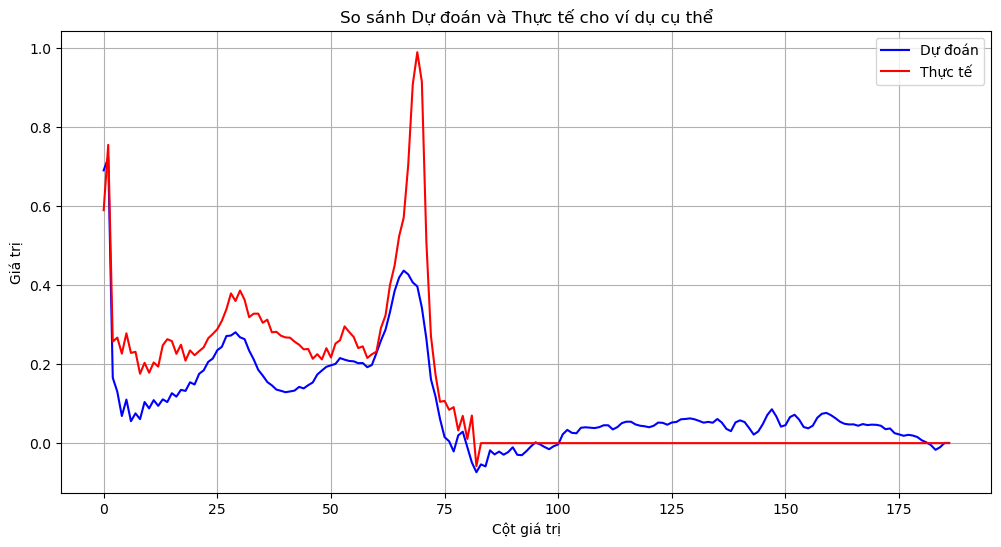

In [12]:
import matplotlib.pyplot as plt

# Chọn một ví dụ cụ thể để trực quan hóa
example_index = 3  # Thay đổi chỉ số ví dụ nếu cần

# Lấy giá trị dự đoán và giá trị thực tế tương ứng
y_pred_example = y_pred[example_index].reshape(5, 187)
y_test_example = y_test[example_index].reshape(5, 187)

# Vẽ biểu đồ cho giá trị dự đoán (màu xanh) và giá trị thực tế (màu đỏ)
plt.figure(figsize=(12, 6))
plt.plot(y_pred_example[0], label='Dự đoán', color='blue')
plt.plot(y_test_example[0], label='Thực tế', color='red')
plt.xlabel('Cột giá trị')
plt.ylabel('Giá trị')
plt.title('So sánh Dự đoán và Thực tế cho ví dụ cụ thể')
plt.legend()
plt.grid()
plt.show()


PHÂN LỚP TÍN HIỆU ECG TƯƠNG LAI

In [13]:
# Đọc file CSV vào DataFrame
data2=df.values

In [14]:
train_size = 0.8
test_size = 1 - train_size

# Tính số lượng dòng cho tập train
num_train_samples = int(len(data2) * train_size)

# Chia dữ liệu thành tập train và tập test
train_data2 = data2[:num_train_samples]
test_data2 = data2[num_train_samples:]

In [15]:
X_train_class= data2[:,:-1]
y_train_class= data2[:,-1].astype(int)

In [16]:
num_samples_test2 = len(test_data2) - window_input - window_out + 1
X_test2, y_test2 = [], []
# Đối với tập test
for i in range(num_samples_test2):
    X_window = data2[i:i+window_input]
    y_window = data2[i+window_input:i+window_input+window_out]

    X_test2.append(X_window)
    y_test2.append(y_window)

In [17]:
y_test2=np.array(y_test2)

In [18]:
y_test2.shape


(361, 5, 188)

In [19]:
y_test2= np.array(y_test2)
y_test2=y_test2.reshape(y_test2.shape[0]*5,188)

In [20]:
#y_test
y_test_class=y_test2[:,-1].astype(int)

In [21]:
np.unique(y_test_class)

array([0, 2, 3])

In [22]:
#Dữ liệu dự đoán (X_test)
X_predict=y_pred.astype(float)

In [23]:
X_predict_test=X_predict.reshape(y_test2.shape[0],187)

In [24]:
print(X_train_class.shape)
print(y_train_class.shape)
print(X_predict_test.shape)
print(y_test_class.shape)

(1875, 187)
(1875,)
(1805, 187)
(1805,)


In [25]:
np.unique(y_train_class)

array([0, 1, 2, 3])

Bagging

DT-Bagging-KNN

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Khởi tạo mô hình DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Khởi tạo mô hình KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Khởi tạo mô hình BaggingClassifier với mô hình KNeighborsClassifier làm mô hình cơ bản
bagging_model = BaggingClassifier(estimator=knn_model, random_state=42)



In [27]:
# Đào tạo mô hình Bagging trên dữ liệu huấn luyện
bagging_model.fit(X_train_class, y_train_class)

BaggingClassifier(estimator=KNeighborsClassifier(), random_state=42)

In [28]:
# Dự đoán với mô hình Bagging
predictions = bagging_model.predict(X_predict_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_class, predictions)
accuracy

0.7745152354570637

DT-Bagging-LR

In [29]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình LogisticRegression
lr_model = LogisticRegression(random_state=42)

# Khởi tạo mô hình BaggingClassifier với mô hình LogisticRegression làm mô hình cơ bản
bagging_model = BaggingClassifier(base_estimator=lr_model, random_state=42)

# Đào tạo mô hình Bagging trên dữ liệu huấn luyện
bagging_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình Bagging
predictions = bagging_model.predict(X_predict_test)
accuracy = accuracy_score(y_test_class, predictions)
accuracy

c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

0.785595567867036

Boosting

DT- XGboost

In [30]:
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Khởi tạo mô hình DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Tạo cấu hình cho mô hình XGBoost với mô hình DecisionTreeClassifier làm mô hình cơ bản
xgb_params = {
    'booster': 'gbtree',  # Sử dụng cây quyết định làm mô hình cơ bản
    'tree_method': 'hist',  # Sử dụng histogram cho tối ưu hóa tốc độ
    'grow_policy': 'lossguide',  # Sử dụng 'lossguide' cho việc tạo độ sâu cây đa dạng
    'random_state': 42
}

# Khởi tạo mô hình XGBoost với cấu hình đã định
xgb_model = xgb.XGBClassifier(**xgb_params)

# Đào tạo mô hình XGBoost trên dữ liệu huấn luyện
xgb_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình XGBoost
predictions = xgb_model.predict(X_predict_test)
accuracy = accuracy_score(y_test_class, predictions)
accuracy

0.8138504155124654

DT-LightGBM

In [31]:
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

# Khởi tạo mô hình DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Khởi tạo mô hình LGBMClassifier với mô hình DecisionTreeClassifier làm mô hình cơ bản
lgbm_model = LGBMClassifier(boosting_type='gbdt', tree_learner='voting', random_state=42)

# Đào tạo mô hình LightGBM trên dữ liệu huấn luyện
lgbm_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình LightGBM
predictions = lgbm_model.predict(X_predict_test)


In [94]:
accuracy = accuracy_score(y_test_class, predictions)
accuracy

0.8094182825484765

DT- CatBoost

In [46]:
from catboost import CatBoostClassifier

# Khởi tạo mô hình CatBoostClassifier sử dụng cây quyết định làm mô hình cơ bản
catboost_model = CatBoostClassifier(boosting_type='Plain', random_seed=42)

# Đào tạo mô hình CatBoost trên dữ liệu huấn luyện
catboost_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình CatBoost
predictions = catboost_model.predict(X_predict_test)
accuracy = accuracy_score(y_test_class, predictions)
accuracy


Learning rate set to 0.081705
0:	learn: 1.2141368	total: 304ms	remaining: 5m 4s
1:	learn: 1.0837606	total: 438ms	remaining: 3m 38s
2:	learn: 0.9776210	total: 519ms	remaining: 2m 52s
3:	learn: 0.8891871	total: 635ms	remaining: 2m 38s
4:	learn: 0.8132177	total: 730ms	remaining: 2m 25s
5:	learn: 0.7487598	total: 860ms	remaining: 2m 22s
6:	learn: 0.6915304	total: 1.01s	remaining: 2m 22s
7:	learn: 0.6440231	total: 1.14s	remaining: 2m 21s
8:	learn: 0.6020347	total: 1.29s	remaining: 2m 21s
9:	learn: 0.5643434	total: 1.42s	remaining: 2m 20s
10:	learn: 0.5313648	total: 1.56s	remaining: 2m 20s
11:	learn: 0.5008015	total: 1.72s	remaining: 2m 21s
12:	learn: 0.4705179	total: 1.86s	remaining: 2m 21s
13:	learn: 0.4456626	total: 2.01s	remaining: 2m 21s
14:	learn: 0.4224662	total: 2.15s	remaining: 2m 21s
15:	learn: 0.4032878	total: 2.27s	remaining: 2m 19s
16:	learn: 0.3842499	total: 2.44s	remaining: 2m 20s
17:	learn: 0.3663528	total: 2.56s	remaining: 2m 19s
18:	learn: 0.3479496	total: 2.69s	remaining: 

0.8160664819944599

Stacking

DT-KNN

In [55]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Khởi tạo mô hình DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Khởi tạo mô hình stacking bằng cách kết hợp KNN và Decision Tree
stacking_model = StackingClassifier(estimators=[('knn', knn_model), ('dt', dt_model)],
                                    final_estimator=KNeighborsClassifier(), stack_method='auto')

# Đào tạo mô hình stacking trên dữ liệu huấn luyện
stacking_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình stacking
predictions = stacking_model.predict(X_predict_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test_class, predictions)
print("Accuracy:", accuracy)


c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.7811634349030471


DT-RF

In [54]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Khởi tạo mô hình DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Khởi tạo mô hình stacking bằng cách kết hợp RandomForest và Decision Tree
stacking_model = StackingClassifier(estimators=[('randomforest', rf_model), ('decisiontree', dt_model)],
                                    final_estimator=KNeighborsClassifier(), stack_method='auto')

# Đào tạo mô hình stacking trên dữ liệu huấn luyện
stacking_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình stacking
predictions = stacking_model.predict(X_predict_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test_class, predictions)
print("Accuracy:", accuracy)


c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.7806094182825485


DT-LR

In [53]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Khởi tạo mô hình LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Khởi tạo mô hình stacking bằng cách kết hợp Decision Tree và Logistic Regression
stacking_model = StackingClassifier(estimators=[('decisiontree', dt_model), ('logisticregression', lr_model)],
                                    final_estimator=KNeighborsClassifier(), stack_method='auto')

# Đào tạo mô hình stacking trên dữ liệu huấn luyện
stacking_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình stacking
predictions = stacking_model.predict(X_predict_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test_class, predictions)
print("Accuracy:", accuracy)


c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.785595567867036


In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, predictions)
cm

array([[1324,    0,   47],
       [  80,    2,    2],
       [ 222,    1,  127]], dtype=int64)

In [80]:
import numpy as np

unique_values, counts = np.unique(predictions, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")


0: 1626
2: 3
3: 176


In [81]:
from sklearn.metrics import recall_score

sensitivity_class_0 = recall_score(y_test_class == 0, predictions == 0)
sensitivity_class_1 = recall_score(y_test_class == 1, predictions == 1)
sensitivity_class_2 = recall_score(y_test_class == 2, predictions == 2)
sensitivity_class_3 = recall_score(y_test_class == 3, predictions == 3)
sensitivity_class_4 = recall_score(y_test_class == 4, predictions == 4)


c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


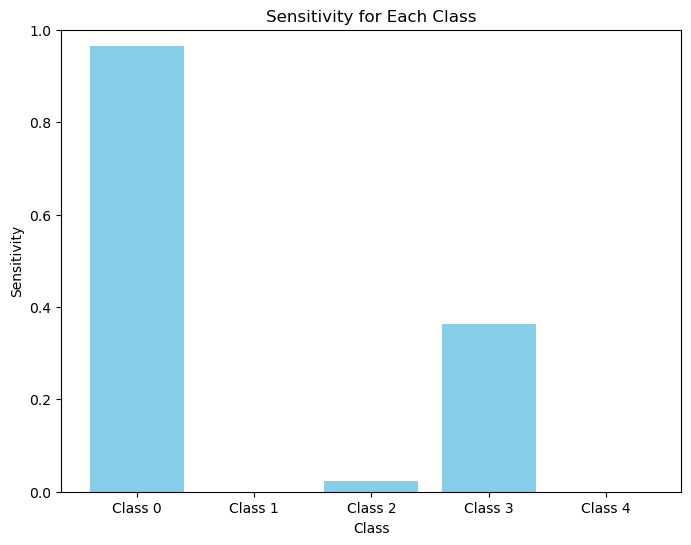

In [82]:
import matplotlib.pyplot as plt

# Sử dụng recall_score để tính sensitivity cho từng lớp
from sklearn.metrics import recall_score

# Giả sử bạn đã tính được sensitivity cho các lớp
sensitivity_scores = [sensitivity_class_0,sensitivity_class_1, sensitivity_class_2, sensitivity_class_3, sensitivity_class_4]

# Tên của các lớp
class_names = ['Class 0','Class 1', 'Class 2', 'Class 3', 'Class 4']

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
plt.bar(class_names, sensitivity_scores, color='skyblue')
plt.title('Sensitivity for Each Class')
plt.xlabel('Class')
plt.ylabel('Sensitivity')
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1 để hiển thị độ nhạy từ 0% đến 100%
plt.show()
